## **D3TOP - Tópicos em Ciência de Dados (IFSP Campinas)**
**Prof. Dr. Samuel Martins (@iamsamucoding @samucoding @xavecoding)** <br/>
xavecoding: https://youtube.com/c/xavecoding <br/><br/>

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.

<hr/>

# Genre Identification by Text Classification

## Sprint 1

We will start solving a **Text Classification** problem. We will train a model to predict movies' genres throught their descriptions <br/>

In this notebook, we will:
- Get the dataset
- Perform a simple analysis
- Split dataset
- Perform feature extraction with TF-IDF (without text preprocessing)
- Train a simple model (logistic regression)

## 1. Get the Dataset
https://www.kaggle.com/datasets/hijest/genre-classification-dataset-imdb

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./Genre Classification Dataset/train_data.txt', sep='\s:::\s', engine='python', header=None, names=['id', 'title', 'genre', 'description'])
df

,id,title,genre,description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...
...,...,...,...,...
54209,54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on B...
54210,54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The siste...
54211,54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about gr..."
54212,54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and have...


## 2. Simple EDA

### 2.1. Info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           54214 non-null  int64 
 1   title        54214 non-null  object
 2   genre        54214 non-null  object
 3   description  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [4]:
# convert datatype from str to category
df['genre'] = df['genre'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   id           54214 non-null  int64   
 1   title        54214 non-null  object  
 2   genre        54214 non-null  category
 3   description  54214 non-null  object  
dtypes: category(1), int64(1), object(2)
memory usage: 1.3+ MB


### 2.2. Class Proportion

In [5]:
df['genre'].value_counts()

drama          13613
documentary    13096
comedy          7447
short           5073
horror          2204
thriller        1591
action          1315
western         1032
reality-tv       884
family           784
adventure        775
music            731
romance          672
sci-fi           647
adult            590
crime            505
animation        498
sport            432
talk-show        391
fantasy          323
mystery          319
musical          277
biography        265
history          243
game-show        194
news             181
war              132
Name: genre, dtype: int64

<AxesSubplot:xlabel='count', ylabel='genre'>

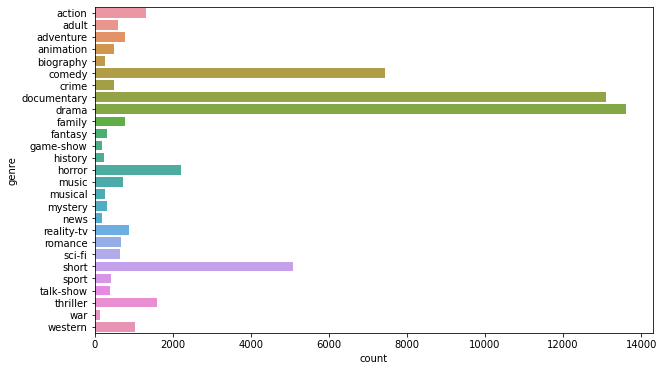

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.countplot(data=df, y='genre')

<AxesSubplot:xlabel='count', ylabel='genre'>

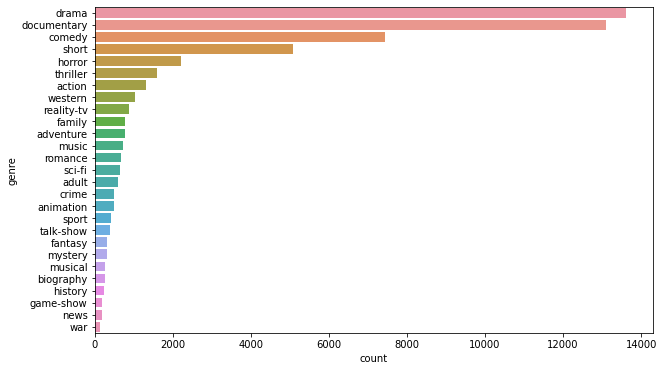

In [7]:
order = df['genre'].value_counts().index

plt.figure(figsize=(10,6))
sns.countplot(data=df, y='genre', order=order)

The dataset is hugely imbalanced!

### 2.3. Label Classes

In [8]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(df['genre'])

LabelEncoder()

In [9]:
print(f'Class labels')

for label, class_ in enumerate(label_encoder.classes_):
    print(f'{class_} ==> {label}')

Class labels
action ==> 0
adult ==> 1
adventure ==> 2
animation ==> 3
biography ==> 4
comedy ==> 5
crime ==> 6
documentary ==> 7
drama ==> 8
family ==> 9
fantasy ==> 10
game-show ==> 11
history ==> 12
horror ==> 13
music ==> 14
musical ==> 15
mystery ==> 16
news ==> 17
reality-tv ==> 18
romance ==> 19
sci-fi ==> 20
short ==> 21
sport ==> 22
talk-show ==> 23
thriller ==> 24
war ==> 25
western ==> 26


In [10]:
df['label'] = label_encoder.transform(df['genre'])

In [11]:
df

,id,title,genre,description,label
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...,8
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...,24
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...,1
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...,8
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...,8
...,...,...,...,...,...
54209,54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on B...,5
54210,54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The siste...,13
54211,54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about gr...",7
54212,54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and have...,5


### 2.4. Check blank description

In [12]:
df[df['description'] == '']

,id,title,genre,description,label


### 2.5. Word Cloud

(-0.5, 399.5, 199.5, -0.5)

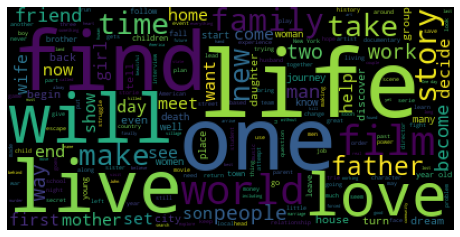

In [13]:
from wordcloud import WordCloud

# Generate a word cloud image
text = ' '.join(df['description'])

wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")

In [14]:
# classes/genres
genres = sorted(df['genre'].unique())
genres

['action',
 'adult',
 'adventure',
 'animation',
 'biography',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'family',
 'fantasy',
 'game-show',
 'history',
 'horror',
 'music',
 'musical',
 'mystery',
 'news',
 'reality-tv',
 'romance',
 'sci-fi',
 'short',
 'sport',
 'talk-show',
 'thriller',
 'war',
 'western']

In [15]:
# number of genres/classes
len(genres)

27

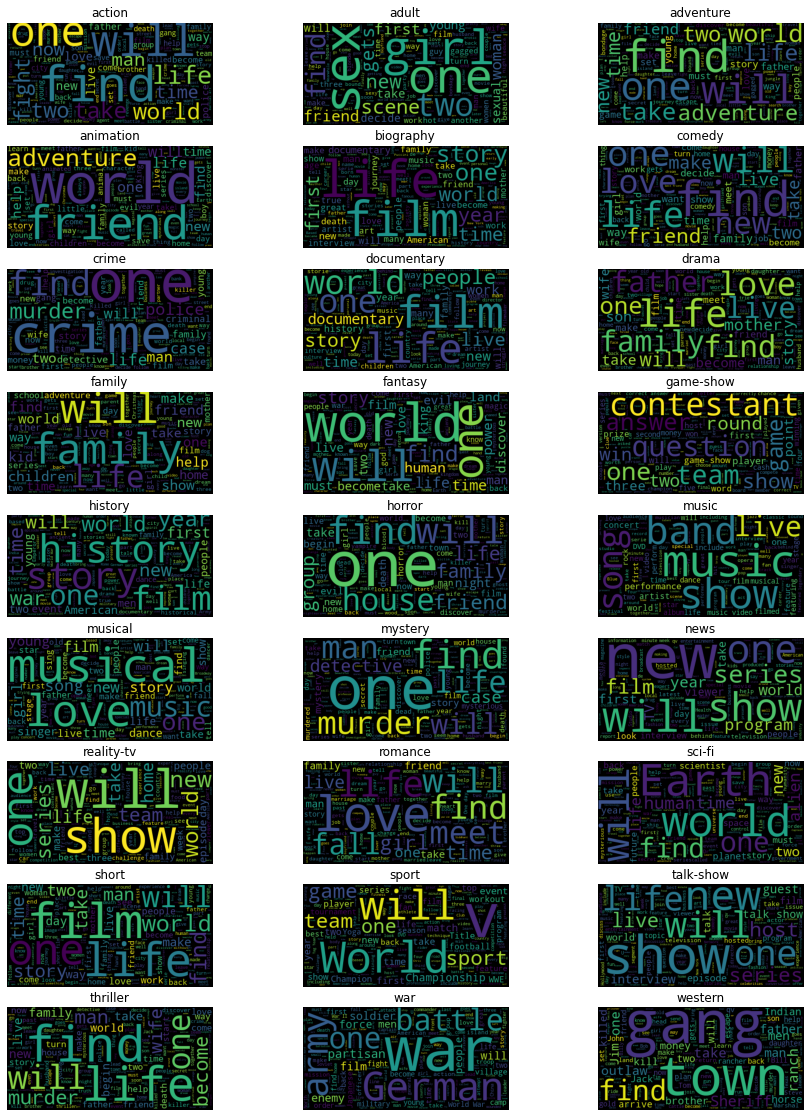

In [16]:
# plot a word cloud for each genre

fig, axes = plt.subplots(9, 3, figsize=(15, 20))

idx = 0

for row in range(9):
    for col in range(3):
        genre = genres[idx]
        
        df_genre = df.query("genre == @genre")

        text = ' '.join(df_genre['description'])
        wordcloud = WordCloud().generate(text)
        axes[row, col].imshow(wordcloud)
        axes[row, col].set_title(f'{genre}')
        axes[row, col].axis('off')

        idx += 1

While there are _stop words_ (which we should remove), we can clearly see that there is a **subset of specific words** related to each _genre_.

We should repeat this analysis after **_text cleaning/preprocessing_**.

## 3. Split the Dataset

In [17]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, stratify=df['genre'], random_state=42)

In [18]:
print(f"===> TRAIN\n{df_train['genre'].value_counts() / df_train.shape[0]}\n")
print(f"===> TEST\n{df_test['genre'].value_counts() / df_test.shape[0]}")

===> TRAIN
drama          0.251089
documentary    0.241567
comedy         0.137350
short          0.093565
horror         0.040649
thriller       0.029351
action         0.024256
western        0.019045
reality-tv     0.016301
family         0.014457
adventure      0.014295
music          0.013488
romance        0.012405
sci-fi         0.011943
adult          0.010883
crime          0.009315
animation      0.009177
sport          0.007978
talk-show      0.007217
fantasy        0.005949
mystery        0.005880
musical        0.005119
biography      0.004888
history        0.004473
game-show      0.003574
news           0.003343
war            0.002444
Name: genre, dtype: float64

===> TEST
drama          0.251130
documentary    0.241538
comedy         0.137416
short          0.093609
horror         0.040671
thriller       0.029328
action         0.024255
western        0.018998
reality-tv     0.016324
family         0.014479
adventure      0.014295
music          0.013465
romance       

In [19]:
# save the datasets
df_train.to_csv('./datasets/genre_classification_train.csv', sep=';', index=False)
df_test.to_csv('./datasets/genre_classification_test.csv', sep=';', index=False)

## 4. Feature Extraction

In [20]:
df_train.head()

,id,title,genre,description,label
27179,27180,Rivals (1972),drama,"Scott Jacoby, as a boy with an unhealthy and p...",8
19974,19975,Kosava (1974),drama,The story of two workers who returned from abr...,8
48283,48284,In Winter (2017),drama,In Winter is an independent feature emerging f...,8
37539,37540,Maria Chapdelaine (1950),drama,"At the beginning of the 20th century, in the N...",8
43388,43389,The Gift Of (2018),comedy,A delicious combo of romantic-comedy and socia...,5


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

# by default, it performs: lowercasing, remove punctuation, strip accents
tfidf = TfidfVectorizer()

X_train = tfidf.fit_transform(df_train['description'])
y_train = df_train['label']

X_test = tfidf.transform(df_test['description'])
y_test = df_test['label']

In [22]:
# all words in the vocabulary.
tfidf.vocabulary_

{'scott': 84472,
 'jacoby': 48328,
 'as': 6573,
 'boy': 12936,
 'with': 104835,
 'an': 4602,
 'unhealthy': 99815,
 'and': 4747,
 'pathological': 70889,
 'attachment': 7175,
 'to': 96509,
 'his': 43373,
 'divorced': 27079,
 'mother': 63626,
 'becomes': 9781,
 'increasingly': 46160,
 'jealous': 48796,
 'of': 67901,
 'the': 95492,
 'new': 66015,
 'man': 58348,
 'in': 45925,
 'life': 55443,
 'robert': 81061,
 'klein': 52087,
 'after': 2857,
 'remarries': 79220,
 'rage': 77106,
 'misery': 62269,
 'overwhelm': 69511,
 'him': 43237,
 'he': 42147,
 'plots': 73334,
 'kill': 51681,
 'stepfather': 91032,
 'story': 91420,
 'two': 98821,
 'workers': 105162,
 'who': 104303,
 'returned': 80091,
 'from': 36332,
 'abroad': 1781,
 'one': 68316,
 'them': 95536,
 'wants': 103364,
 'find': 34415,
 'good': 39119,
 'job': 49276,
 'adam': 2266,
 'other': 69042,
 'earn': 29067,
 'money': 63011,
 'by': 14686,
 'smuggling': 88558,
 'beli': 10070,
 'between': 10692,
 'there': 95601,
 'young': 106181,
 'woman': 10

Note that there are a lot of **stop words** and **numbers** that will hinder our classification.

In [23]:
print(f'Vocabulary size: {len(tfidf.vocabulary_)}')

Vocabulary size: 107481


In [24]:
print('Number of Feats')
print(f'Train.shape: {X_train.shape}')
print(f'Test.shape: {X_test.shape}')

Number of Feats
Train.shape: (43371, 107481)
Test.shape: (10843, 107481)


## 5. Train the models

In [25]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(class_weight='balanced')

logreg.fit(X_train, y_train)

/home/hisamuka/yeah/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

In [26]:
# prediction on training set
y_train_pred = logreg.predict(X_train)

In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_pred, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

      action       0.55      0.82      0.66      1052
       adult       0.53      0.99      0.69       472
   adventure       0.63      0.93      0.75       620
   animation       0.63      0.98      0.77       398
   biography       0.38      1.00      0.55       212
      comedy       0.73      0.57      0.64      5957
       crime       0.44      0.99      0.61       404
 documentary       0.85      0.67      0.75     10477
       drama       0.81      0.46      0.59     10890
      family       0.47      0.91      0.62       627
     fantasy       0.56      1.00      0.72       258
   game-show       0.78      1.00      0.88       155
     history       0.38      1.00      0.55       194
      horror       0.75      0.87      0.80      1763
       music       0.50      0.97      0.66       585
     musical       0.52      1.00      0.69       222
     mystery       0.57      1.00      0.72       255
        news       0.56    

In [28]:
from sklearn.metrics import f1_score

f1_train = f1_score(y_train, y_train_pred, average='macro')

print(f'F1 Train: {f1_train}')

F1 Train: 0.6670408743567493


In [29]:
from sklearn.metrics import balanced_accuracy_score

balacc_train = balanced_accuracy_score(y_train, y_train_pred)

print(f'Balanced Acc Train: {balacc_train}')

Balanced Acc Train: 0.8993601423839414


## 6. Evaluate the model on the Test Set

In [30]:
# prediction on testing set
y_test_pred = logreg.predict(X_test)

In [31]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

      action       0.32      0.49      0.38       263
       adult       0.37      0.75      0.50       118
   adventure       0.23      0.30      0.26       155
   animation       0.19      0.27      0.22       100
   biography       0.07      0.15      0.09        53
      comedy       0.59      0.45      0.51      1490
       crime       0.14      0.31      0.19       101
 documentary       0.78      0.63      0.70      2619
       drama       0.70      0.40      0.50      2723
      family       0.17      0.31      0.22       157
     fantasy       0.13      0.20      0.15        65
   game-show       0.71      0.69      0.70        39
     history       0.10      0.31      0.16        49
      horror       0.57      0.68      0.62       441
       music       0.39      0.83      0.53       146
     musical       0.10      0.15      0.12        55
     mystery       0.10      0.14      0.12        64
        news       0.16    

In [32]:
from sklearn.metrics import f1_score

f1_test = f1_score(y_test, y_test_pred, average='macro')

print(f'F1 Test: {f1_test}')

F1 Test: 0.36220910159783865


<br/>

The resulting **F1 score** for the testing set is low, so we need to ***improve*** our solution. <br/>
Some possibilities:
- Perform _text preprocessing_
- Try different _feature extractors_
- Try different _classifiers_
- Fine-tuning